In [1]:
# K-Means Clustering

import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

from sklearn.cluster import KMeans

In [2]:
# Prepare data. 
X = np.array([[5,3],
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

Text(0, 0.5, 'feature 2')

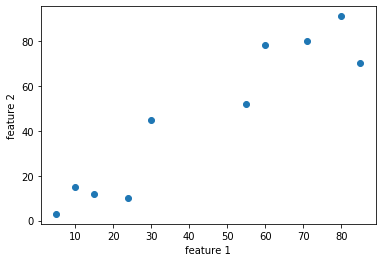

In [3]:
plt.scatter(X[:,0], X[:,1], label='True Position')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [4]:
# Create clusters. 
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
# Centroid values
print(kmeans.cluster_centers_)

[[70.2 74.2]
 [16.8 17. ]]


In [6]:
# See the labels. 
print(kmeans.labels_)

[1 1 1 1 1 0 0 0 0 0]


In [7]:
cluster_predicted = kmeans.predict(X)

In [8]:
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(cluster_predicted)], axis=1)
merge_data.columns = ['x','y','cluster']
merge_data

,x,y,cluster
0,5,3,1
1,10,15,1
2,15,12,1
3,24,10,1
4,30,45,1
5,85,70,0
6,71,80,0
7,60,78,0
8,55,52,0
9,80,91,0


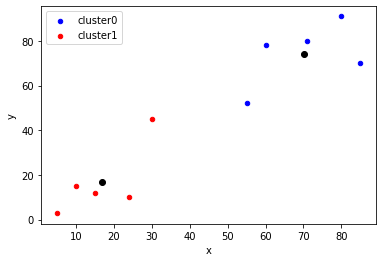

In [9]:
# Visualize the data. 
colors = ['blue','red']
# plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
ax = None
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='x', y='y', 
                           color=colors[i], label=f'cluster{i}', ax=ax)

# Plot the centroids.
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

Text(0, 0.5, 'feature 2')

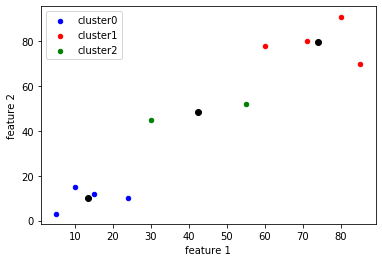

In [10]:
# Num of cluster is 3. 

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# print(kmeans.labels_)
cluster_predicted = kmeans.predict(X)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(cluster_predicted)], axis=1)
merge_data.columns = ['x','y','cluster']

colors = ['blue','red','green']
ax = None
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='x', y='y', 
                           color=colors[i], label=f'cluster{i}', ax=ax)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

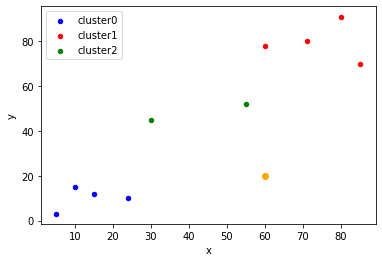

In [11]:
# Add a new data and predict the cluster. 

ax = None
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='x', y='y', 
                           color=colors[i], label=f'cluster{i}', ax=ax)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

new_data = np.array([[60, 20]])
plt.scatter(new_data[:,0], new_data[:,1], c='orange')

In [12]:
cluster_pred = kmeans.predict(new_data)
cluster_pred

array([2], dtype=int32)

In [13]:
new_data = np.append(new_data, cluster_pred)
new_data_s = pd.Series(new_data, index=merge_data.columns)
new_data_s

x          60
y          20
cluster     2
dtype: int64

In [14]:
# Append the new data. 

merge_data = merge_data.append(new_data_s, ignore_index=True)
merge_data

,x,y,cluster
0,5,3,0
1,10,15,0
2,15,12,0
3,24,10,0
4,30,45,2
5,85,70,1
6,71,80,1
7,60,78,1
8,55,52,2
9,80,91,1


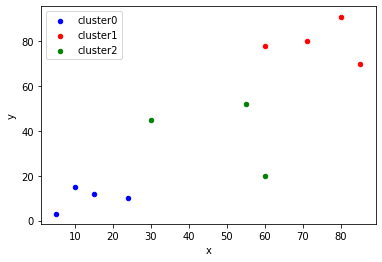

In [15]:
# Visualize. 
ax = None
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='x', y='y', 
                           color=colors[i], label=f'cluster{i}', ax=ax)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

In [16]:
# More than 2 dimensions
